# Data Analysis and Preprocessing for Credit Card Customer Churn Dataset

### Importing all the dependencies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

### Loading dataset from Github [It may take some time]

In [28]:
df = pd.read_csv('Customer_Churn_Classification.csv')
df.head()

,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,france,germany,spain,female,male,mem__no__products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product
0,2023,668.0,33.0,3,0.00,2,1,0,181449.97,0,...,1,0,0,0,1,0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1,0.00,2,1,1,49503.50,0,...,1,0,0,0,1,2,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10,0.00,2,1,0,184866.69,0,...,1,0,0,0,1,0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2,148882.54,1,1,1,84560.88,0,...,1,0,0,0,1,1,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5,0.00,2,1,1,15068.83,0,...,0,0,1,0,1,2,0.000000,0.000000,0.151515,165.0


### In this dataset no missing value. Insted they are replaced with Zero. So we replaced the Zeros with NaN

In [29]:
column_names = ["creditscore","age","tenure","balance","estimatedsalary","mem__no__products","cred_bal_sal","bal_sal","tenure_age","age_tenure_product"]
df[column_names] = df[column_names].replace(0, np.nan)

In [30]:
# Check for missing values\
df.isnull().sum()

surname                   0
creditscore               0
age                       0
tenure                 5420
balance               93264
numofproducts             0
hascrcard                 0
isactivemember            0
estimatedsalary           0
exited                    0
surname_tfidf_0           0
surname_tfidf_1           0
surname_tfidf_2           0
surname_tfidf_3           0
surname_tfidf_4           0
france                    0
germany                   0
spain                     0
female                    0
male                      0
mem__no__products     87732
cred_bal_sal          93264
bal_sal               93264
tenure_age             5420
age_tenure_product     5420
dtype: int64

### Droped some unnecessary columns

In [31]:
# drop the columns that are not needed
columns_to_drop = ["surname", "surname_tfidf_0" ,"surname_tfidf_1" ,"surname_tfidf_2", "surname_tfidf_3" ,"surname_tfidf_4"]
df = df.drop(columns=columns_to_drop)
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,france,germany,spain,female,male,mem__no__products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product
count,175028.000000,175028.000000,169608.000000,81764.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,87296.000000,8.176400e+04,81764.000000,169608.000000,169608.000000
mean,656.113068,38.171337,5.180387,121325.058311,1.553072,0.751183,0.498754,111863.295024,0.211149,0.566909,0.212046,0.221045,0.436644,0.563356,1.573898,3.091874e+03,4.714765,0.143015,197.461619
std,81.148273,8.969565,2.706307,25455.756667,0.549212,0.432329,0.500000,50815.118428,0.408125,0.495504,0.408758,0.414952,0.495971,0.495971,0.530563,8.918016e+04,135.555631,0.083092,115.515104
min,350.000000,18.000000,1.000000,18.330000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.147007e-01,0.000148,0.010870,18.000000
25%,597.000000,32.000000,3.000000,104796.540000,1.000000,1.000000,0.000000,73225.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.018287e+02,0.773878,0.074074,102.000000
50%,659.000000,37.000000,5.000000,122096.730000,2.000000,1.000000,0.000000,116969.730000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.914393e+02,1.051664,0.135135,188.000000
75%,710.000000,42.000000,8.000000,137841.530000,2.000000,1.000000,1.000000,154767.340000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.104113e+03,1.669450,0.200000,276.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.634204e+06,12863.796200,0.555556,880.000000


### We also droped some columns that have no correlation with our target after seeing the Correlation matrix

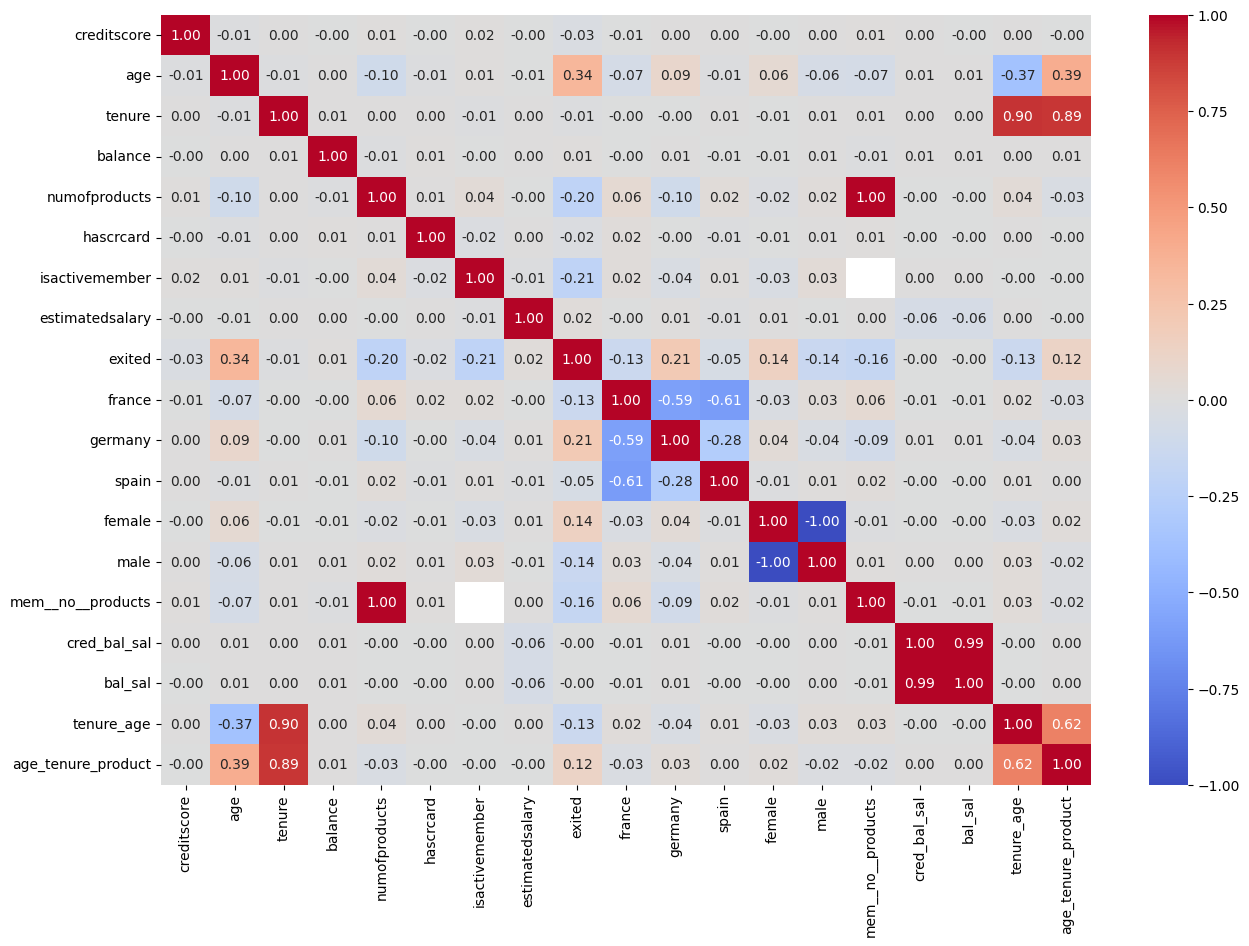

In [32]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [33]:
columns_to_drop = ["mem__no__products",	"cred_bal_sal",	"bal_sal", "balance"]
df = df.drop(columns=columns_to_drop)
df.isnull().sum()

creditscore              0
age                      0
tenure                5420
numofproducts            0
hascrcard                0
isactivemember           0
estimatedsalary          0
exited                   0
france                   0
germany                  0
spain                    0
female                   0
male                     0
tenure_age            5420
age_tenure_product    5420
dtype: int64

#### Droped the rows with missing values

In [34]:
df = df.dropna()
df.shape

(169608, 15)

## Outlier Handling

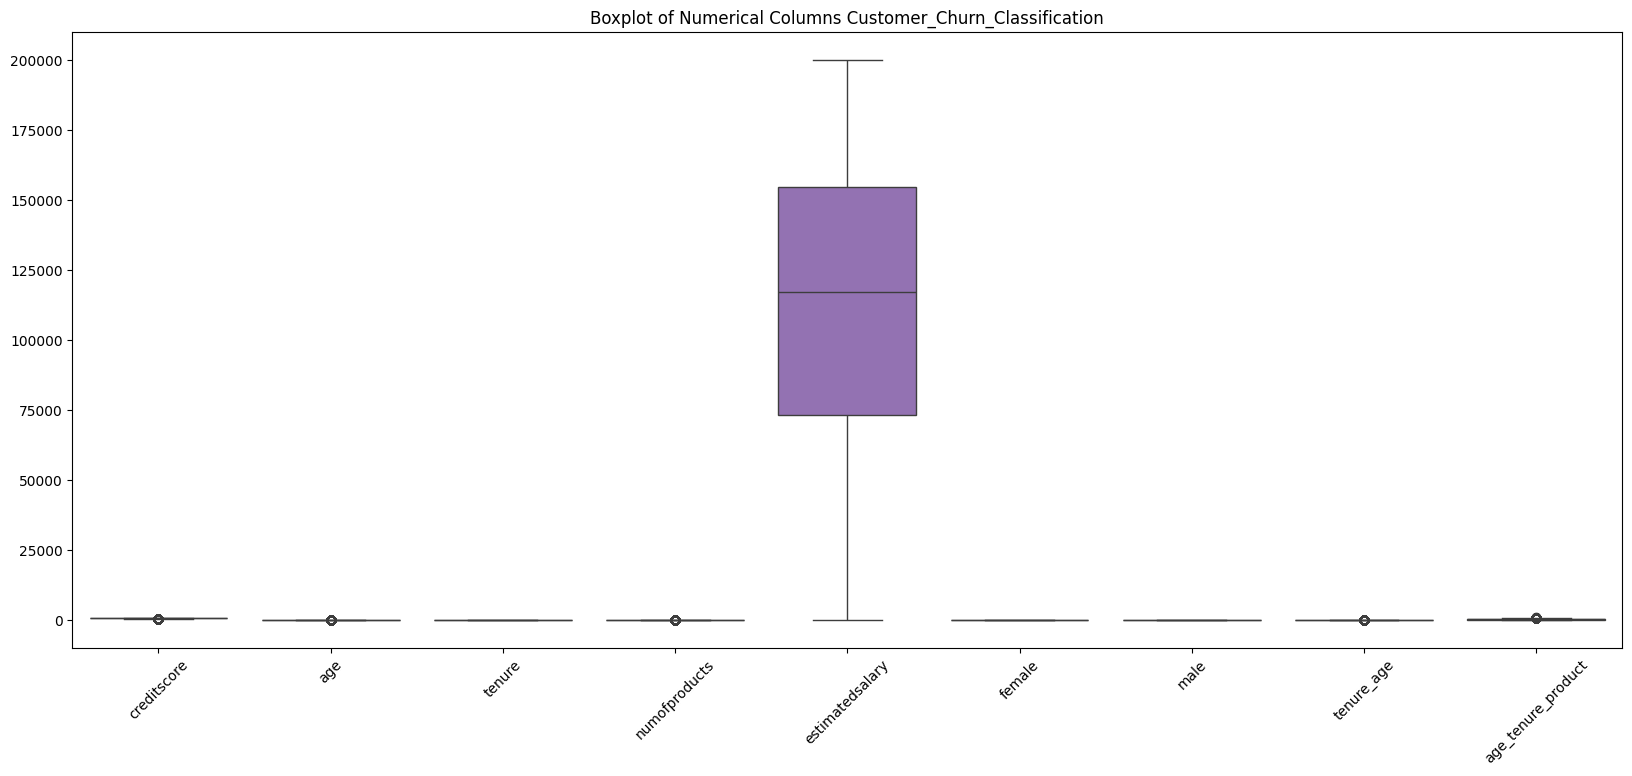

In [35]:
# Column to exclude
exclude = ["hascrcard", "isactivemember", "exited", "france","germany" ,"spain"]
# Columns to include
include = [col for col in df.columns if col not in exclude]

# Create boxplots
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[include])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns Customer_Churn_Classification")
plt.show()


## Analysis Statistical Outlier detection

### Z Score

In [36]:
# Outlier detection using Z-score method
z_scores = stats.zscore(df[include])
abs_z_scores = abs(z_scores)
threshold = 3
outlier_indices = (abs_z_scores > threshold).any(axis=1)

# Number of outliers detected
print("Number of outliers detected:", outlier_indices.sum())

# Display the row indices containing outliers
outlier_rows = df[outlier_indices]
print("Row indices containing outliers:", outlier_rows.index.tolist())



Number of outliers detected: 3807
Row indices containing outliers: [12, 169, 195, 223, 263, 290, 449, 458, 601, 680, 727, 800, 935, 1030, 1037, 1162, 1191, 1216, 1231, 1241, 1257, 1329, 1331, 1333, 1390, 1465, 1555, 1572, 1590, 1618, 1653, 1723, 1937, 2037, 2071, 2092, 2095, 2144, 2146, 2195, 2245, 2335, 2654, 2711, 2717, 2729, 2773, 2792, 2864, 2880, 2928, 3101, 3134, 3140, 3148, 3183, 3198, 3204, 3225, 3256, 3269, 3300, 3321, 3515, 3614, 3616, 3629, 3719, 3741, 3816, 3831, 3934, 4073, 4145, 4213, 4264, 4439, 4452, 4458, 4517, 4534, 4537, 4550, 4618, 4663, 4714, 4717, 4796, 4835, 4952, 4971, 4973, 4982, 4987, 5024, 5058, 5088, 5137, 5229, 5264, 5299, 5344, 5395, 5514, 5633, 5732, 5770, 5782, 5794, 5801, 5823, 5865, 5890, 5949, 5955, 6045, 6102, 6122, 6126, 6139, 6168, 6308, 6451, 6475, 6495, 6682, 6686, 6793, 6811, 6867, 6891, 6979, 6985, 6987, 7069, 7088, 7120, 7145, 7167, 7203, 7275, 7311, 7363, 7454, 7501, 7505, 7756, 7787, 7795, 7796, 7840, 8081, 8127, 8129, 8131, 8239, 8382, 8387

### Interquantile Range

In [37]:

# Calculate IQR
Q1 = df[include].quantile(0.25)
Q3 = df[include].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers_mask = ((df[include] < (Q1 - 1.5 * IQR)) | (df[include] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = df[outliers_mask]

# Print results
print("Outliers detected using IQR:", outliers_df.shape[0])
# Drop the outliers
df = df[~outliers_mask]
print("After deleting Outliers detected column-wise:")
print(((df[include] < (Q1 - 1.5 * IQR)) | (df[include] > (Q3 + 1.5 * IQR))).sum())

Outliers detected using IQR: 8434
After deleting Outliers detected column-wise:
creditscore           0
age                   0
tenure                0
numofproducts         0
estimatedsalary       0
female                0
male                  0
tenure_age            0
age_tenure_product    0
dtype: int64


## Machine Learning Method to detect Outlier

In [38]:
# Outlier detection using LOF method
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(df[include])
outlier_indices_lof = df[outlier_labels == -1]

# Total number of outliers detected
print("Number of outliers detected using LOF:", outlier_indices_lof.shape[0])


Number of outliers detected using LOF: 3101


In [39]:
# Drop missing values for Isolation Forest analysis
df_clean = df[include]

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso_forest.fit_predict(df_clean)
outliers_iso = df_clean[outlier_preds == -1]

# Total number of outliers detected
print("Number of outliers detected using Isolation Forest:", outliers_iso.shape[0])


Number of outliers detected using Isolation Forest: 8059


## Seeing the Box plot again after handling outlier

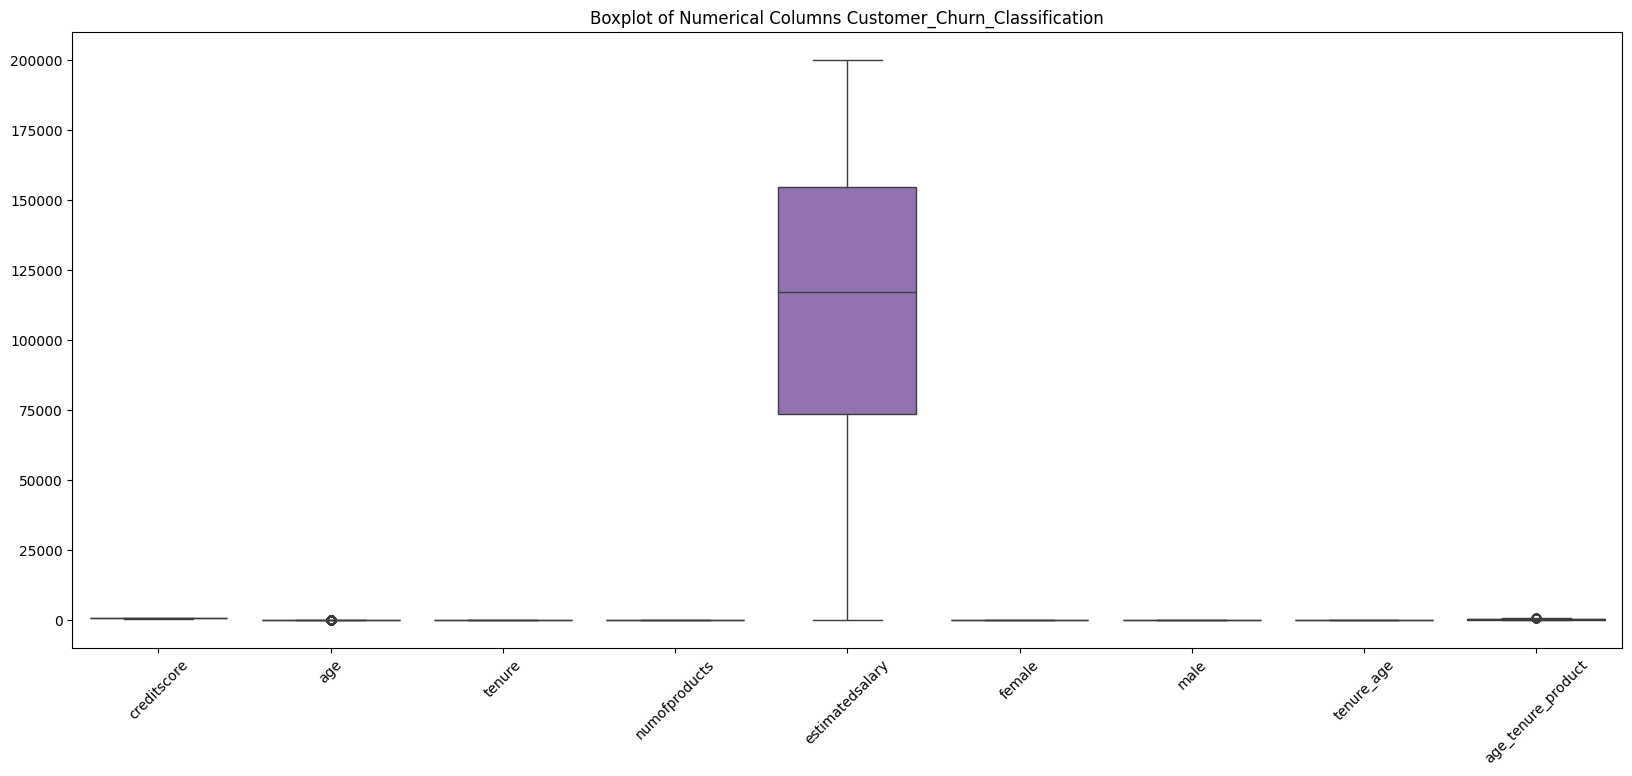

In [40]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[include])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns Customer_Churn_Classification")
plt.show()

In [41]:
df.shape

(161174, 15)

## Scaling

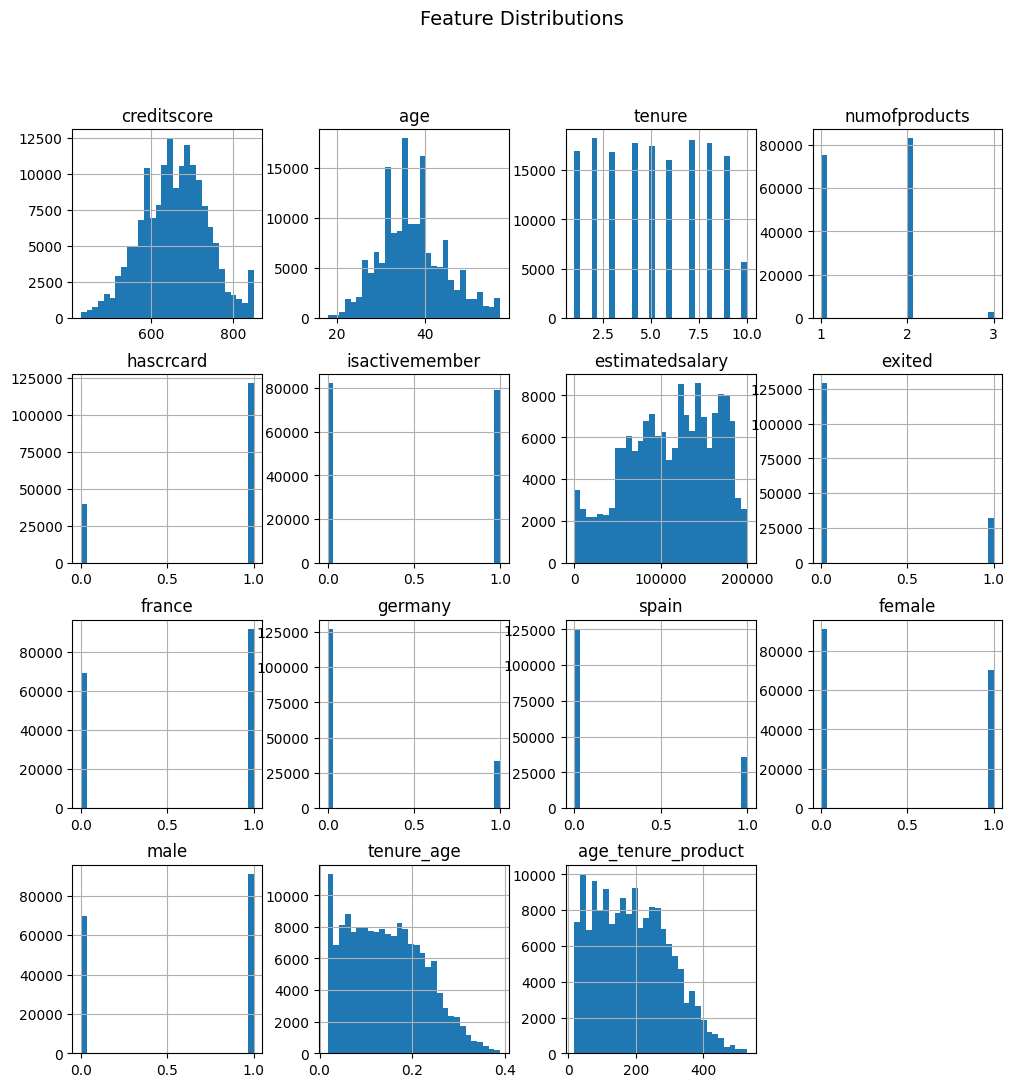

In [42]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[numerical_features].hist(figsize=(12, 12), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


### Applying Standard Scaling to Normal distrubution data and MinMax Scaler to Skewed data

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns to scale
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply StandardScaler for normally distributed features
df_scaled = df.copy()
df_scaled[['creditscore', 'age']] = standard_scaler.fit_transform(df[['creditscore', 'age']])

# Apply MinMaxScaler for skewed features
df_scaled[['estimatedsalary', 'tenure_age', 'age_tenure_product']] = minmax_scaler.fit_transform(
    df[['estimatedsalary', 'tenure_age', 'age_tenure_product']]
)


In [44]:
print("Before Scaling:")
print(df[['creditscore', 'age', 'estimatedsalary', 'tenure_age', 'age_tenure_product']].describe())

print("\nAfter Scaling:")
print(df_scaled[['creditscore', 'age', 'estimatedsalary', 'tenure_age', 'age_tenure_product']].describe())


Before Scaling:
         creditscore            age  estimatedsalary     tenure_age  \
count  161174.000000  161174.000000    161174.000000  161174.000000   
mean      656.570439      37.138160    112043.377442       0.144361   
std        80.288070       7.323487     50691.383625       0.081376   
min       428.000000      18.000000        11.580000       0.017544   
25%       597.000000      32.000000     73585.180000       0.075472   
50%       659.000000      37.000000    117035.930000       0.138889   
75%       710.000000      41.000000    154642.660000       0.205128   
max       850.000000      57.000000    199992.480000       0.388889   

       age_tenure_product  
count       161174.000000  
mean           191.711593  
std            108.723815  
min             18.000000  
25%            100.000000  
50%            185.000000  
75%            270.000000  
max            530.000000  

After Scaling:
        creditscore           age  estimatedsalary     tenure_age  \
count  

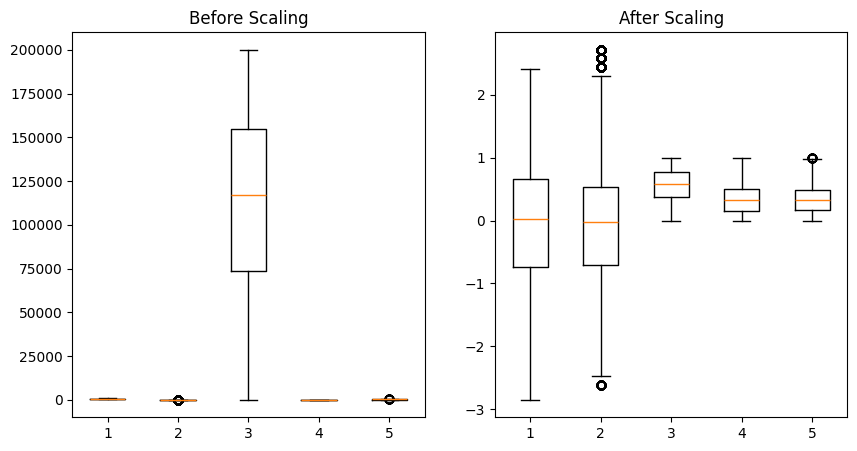

In [45]:
#Check if Scaling worked

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df[['creditscore', 'age', 'estimatedsalary', 'tenure_age', 'age_tenure_product']])
plt.title("Before Scaling")

plt.subplot(1,2,2)
plt.boxplot(df_scaled[['creditscore', 'age', 'estimatedsalary', 'tenure_age', 'age_tenure_product']])
plt.title("After Scaling")

plt.show()


# Exploratory Data Analysis

In [46]:
df.head()

,creditscore,age,tenure,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,france,germany,spain,female,male,tenure_age,age_tenure_product
0,668.0,33.0,3.0,2,1,0,181449.97,0,1,0,0,0,1,0.090909,99.0
1,627.0,33.0,1.0,2,1,1,49503.50,0,1,0,0,0,1,0.030303,33.0
2,678.0,40.0,10.0,2,1,0,184866.69,0,1,0,0,0,1,0.250000,400.0
3,581.0,34.0,2.0,1,1,1,84560.88,0,1,0,0,0,1,0.058824,68.0
4,716.0,33.0,5.0,2,1,1,15068.83,0,0,0,1,0,1,0.151515,165.0


### Bar plots for binary and categorical features Vs Counts

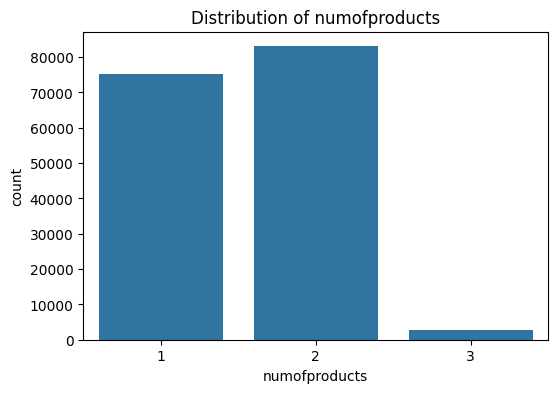

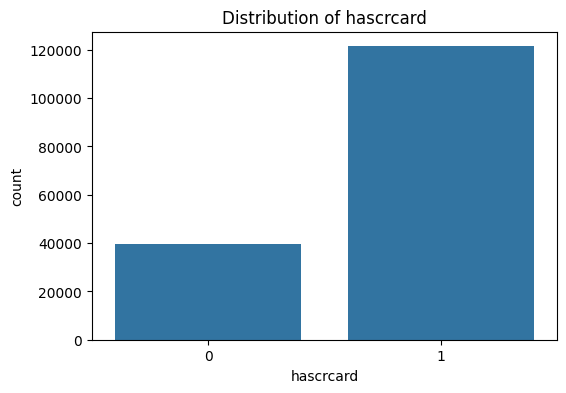

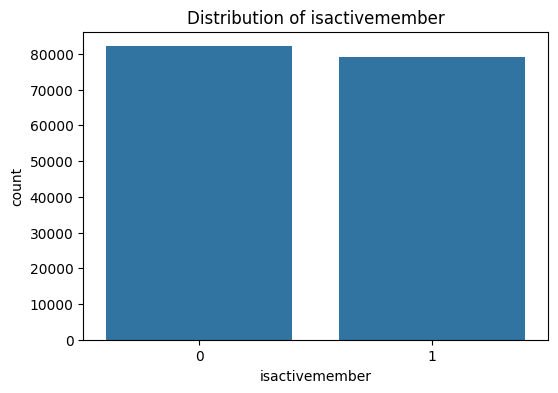

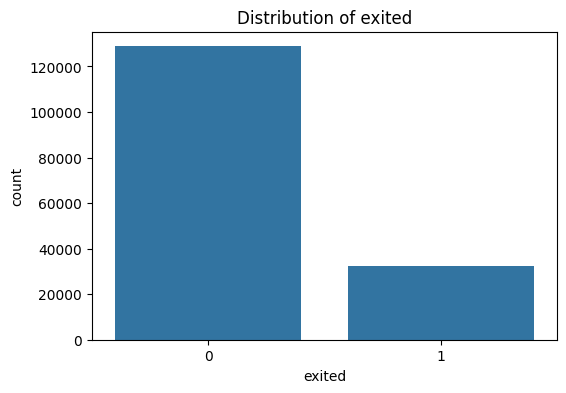

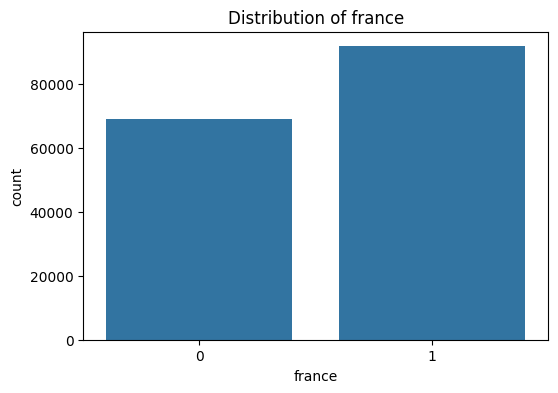

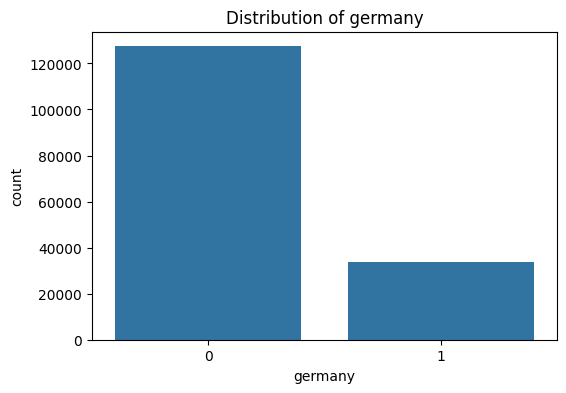

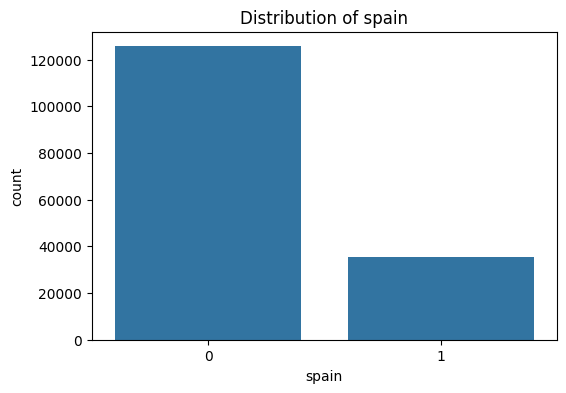

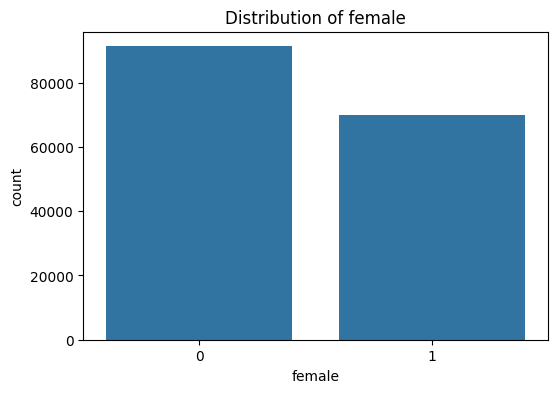

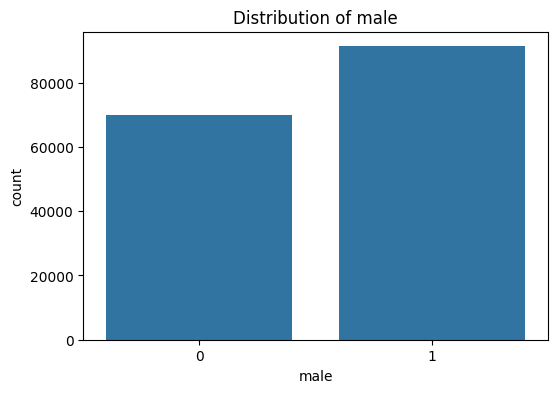

In [47]:
categorical_cols = ["numofproducts", "hascrcard", "isactivemember", "exited", "france", "germany", "spain", "female", "male"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()


### Visualizing some highly correlated features with our target features

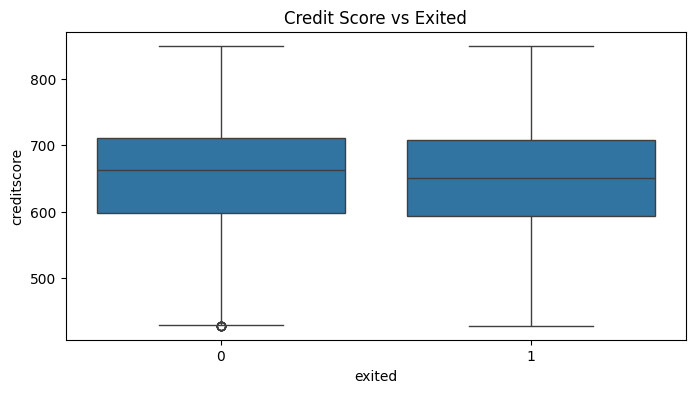

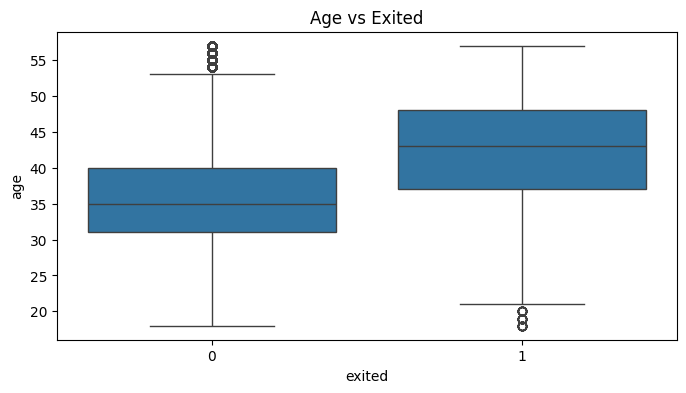

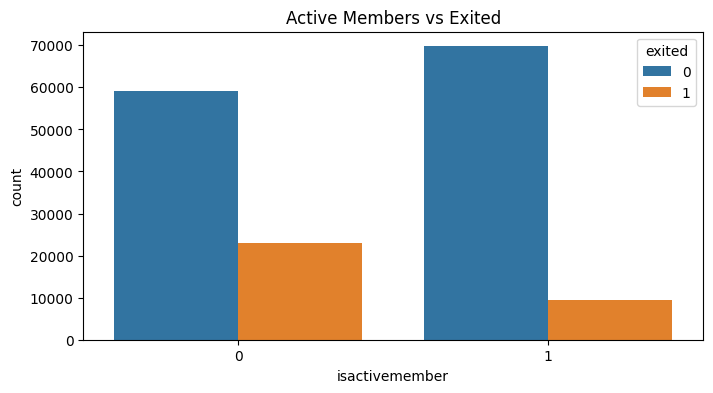

In [48]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["exited"], y=df["creditscore"])
plt.title("Credit Score vs Exited")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["exited"], y=df["age"])
plt.title("Age vs Exited")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x=df["isactivemember"], hue=df["exited"])
plt.title("Active Members vs Exited")
plt.show()


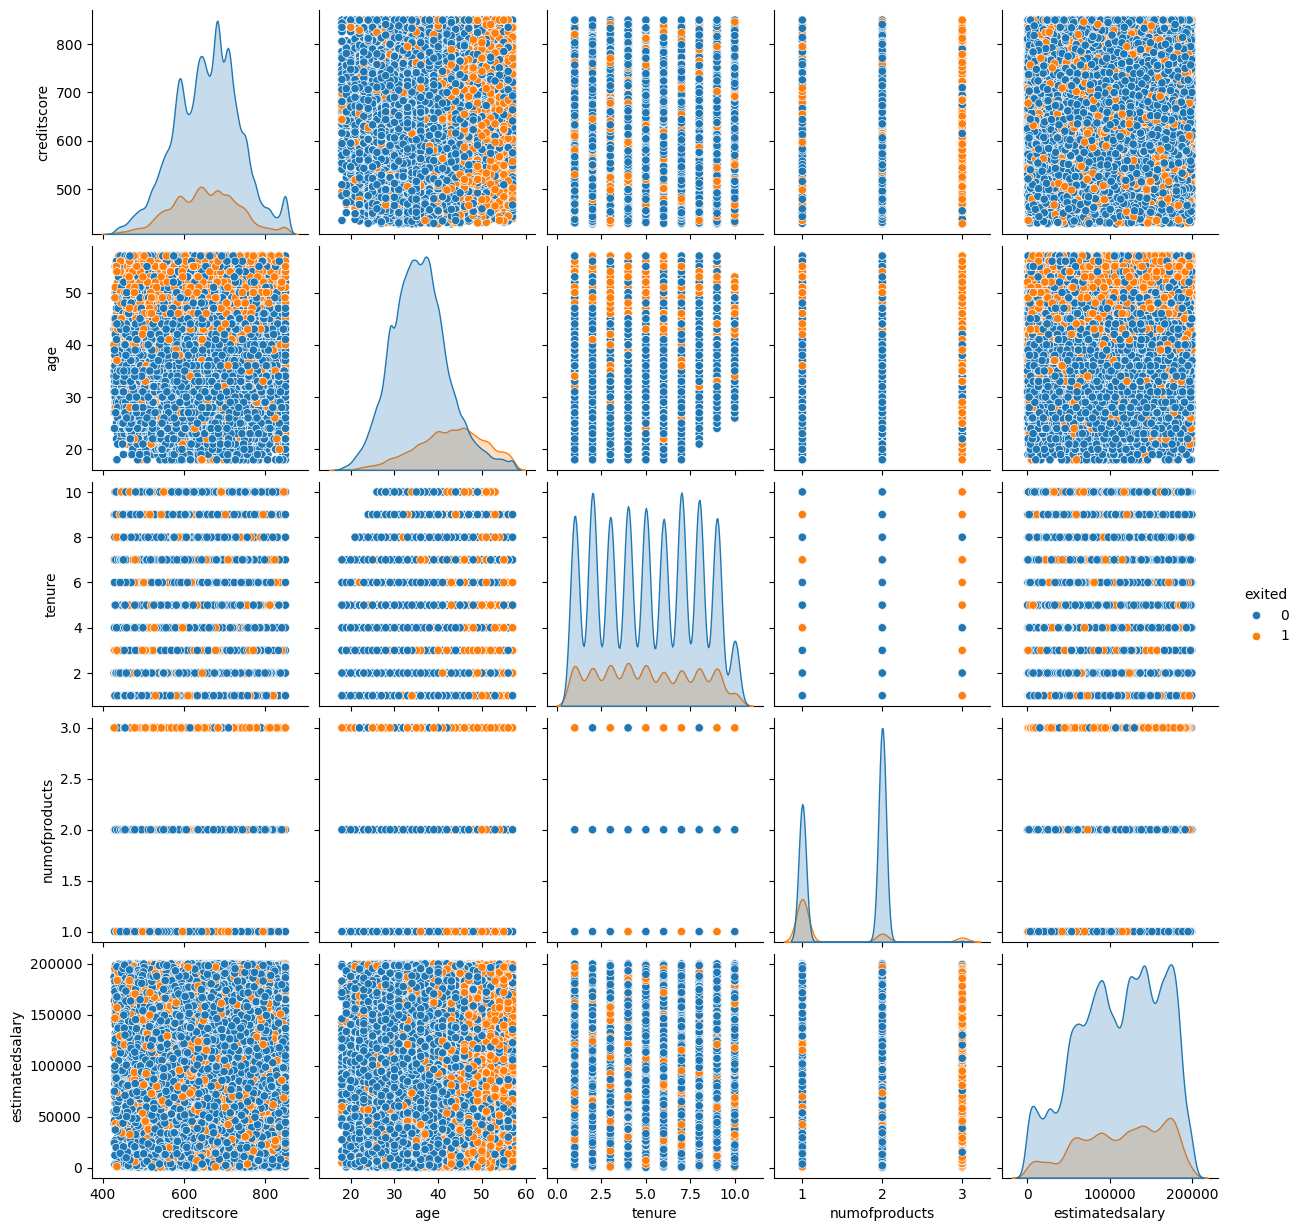

In [49]:
sns.pairplot(df[["creditscore", "age", "tenure", "numofproducts", "estimatedsalary", "exited"]], hue="exited")
plt.show()
